In [1]:
import numpy as np
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import randrange
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

train_images_fit = x_train.reshape((x_train.shape[0], 28, 28, 1))
test_images_fit = x_test.reshape((x_test.shape[0], 28, 28, 1))


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Exemplo de uma rede simples
10 neurônios na camada intermediária

In [2]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(15, input_dim=784, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [3]:
batch_size = 128
epochs = 3
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 24s 54ms/step - loss: 0.4240 - accuracy: 0.8605 - val_loss: 0.0833 - val_accuracy: 0.9762
Epoch 2/3
422/422 [==============================] - 22s 52ms/step - loss: 0.0997 - accuracy: 0.9693 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 3/3
422/422 [==============================] - 23s 54ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.0526 - val_accuracy: 0.9832


In [4]:
def print_loss_accuracy(model):
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
print_loss_accuracy(model)

Test loss: 0.0550706721842289
Test accuracy: 0.9842000007629395


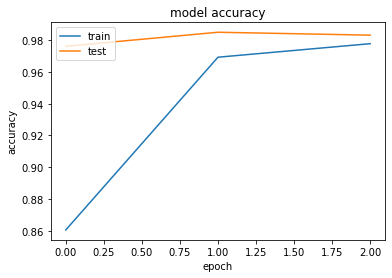

In [5]:
def plot_accuracy_convergence(history):
  # Plotando acurácia ao longo das épocas
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_accuracy_convergence(history)

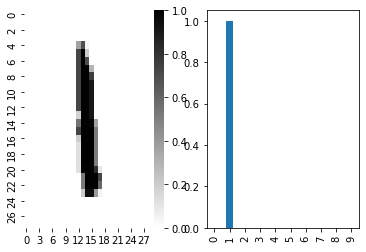

In [8]:
def give_me_some_estimative():
  ii_test = randrange(y_test.shape[0])
  plt.subplot(1, 2, 1)
  sns.heatmap(x_test[ii_test].reshape(28, 28), cmap = 'gray_r', vmin = 0, vmax = 1)
  plt.subplot(1, 2, 2)
  pd.Series(model.predict(x_test[ii_test].reshape(1, 28, 28))[0]).plot(kind = 'bar')
give_me_some_estimative()